In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
from sklearn.datasets import make_swiss_roll, make_blobs, load_digits
from sklearn import decomposition
from sklearn.manifold import TSNE

%matplotlib inline

In [2]:
n_samples = 2500

def generate_swiss_roll_data(n_samples):
    noise = 0.05
    X, _ = make_swiss_roll(n_samples, noise)
    # Make it thinner
    X[:, 1] *= .5
    distance_from_y_axis = X[:, 0] ** 2 + X[:, 2] ** 2 
    X_color = plt.cm.jet(distance_from_y_axis / np.max(distance_from_y_axis + 1))
    return X, X_color, "Swiss roll"

In [3]:
def generate_gaussian_blobs(n_samples):
    X, y = make_blobs(n_samples=n_samples, centers=5, n_features=3,random_state=3)
    X_color = plt.cm.jet(y / np.max(y + 1))
    return X, X_color, "Gaussian blobs"

In [4]:
def generate_gaussian_blobs_different(n_samples):
    X, y = make_blobs(n_samples=n_samples, centers=2, n_features=3,random_state=3)
    X[y == 1, :] *= 2
    X_color = plt.cm.jet(y / np.max(y + 1))
    return X, X_color, "Gaussian blobs different sizes"

In [5]:
def generate_digits(n_samples):
    X, y = load_digits(n_class = 10, return_X_y = True)
    X_color = plt.cm.jet(y / np.max(y + 1))
    return X, X_color, "Digits"

In [7]:
def produce_plots(data_generator, data_generator_name):
    X, X_color, title = data_generator(n_samples)
    fig = plt.figure()
    ax = p3.Axes3D(fig)
    ax.view_init(7, -80)
    ax.scatter(X[:, 0], X[:, 1], X[:, 2],
            color = X_color,
            s=20, edgecolor='k')
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_zlabel('$z$')
    plt.title(title)
    plt.savefig(data_generator_name + '.png')

    # Fit and plot PCA
    X_pca = decomposition.PCA(n_components=2).fit_transform(X)
    fig = plt.figure()
    s = fig.add_subplot(1, 1, 1, xlabel='$x$', ylabel='$y$')
    s.scatter(X_pca[:, 0], X_pca[:, 1], c = X_color)
    plt.title(title + " - PCA")
    fig.savefig(data_generator_name  + '_pca.png')

    # Fit and plot tSNE
    X_tsne = TSNE(n_components=2).fit_transform(X)
    fig = plt.figure()
    s = fig.add_subplot(1, 1, 1, xlabel='$x$', ylabel='$y$')
    s.scatter(X_tsne[:, 0], X_tsne[:, 1], c = X_color)
    plt.title(title + " - tSNE")
    fig.savefig(data_generator_name + '_tsne.png')

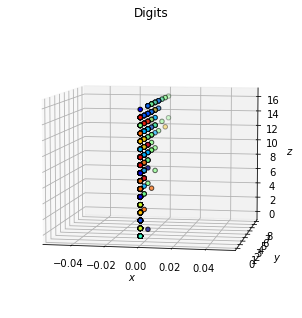

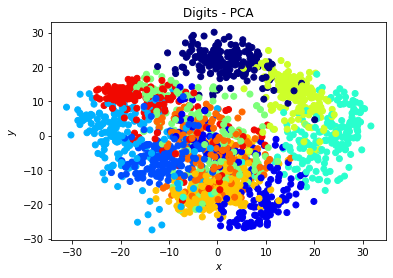

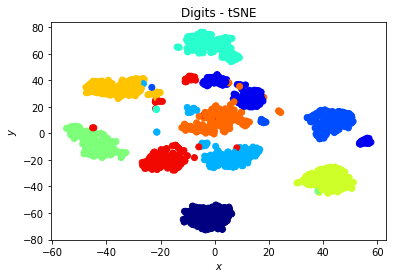

In [8]:
produce_plots(generate_digits, "digits")

E:\Data Science\Anaconda\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass noise=0.05 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


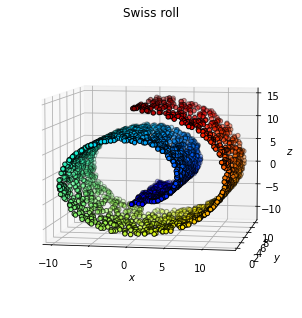

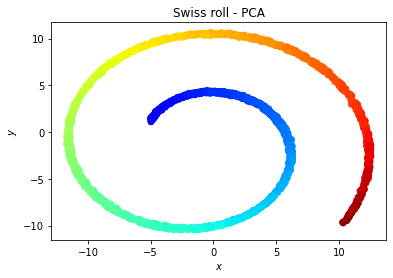

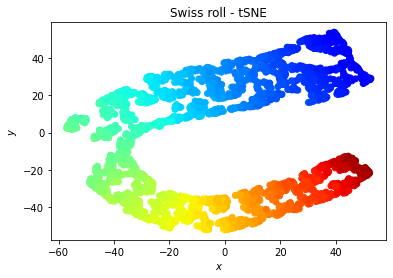

In [10]:
produce_plots(generate_swiss_roll_data, "swiss_roll")

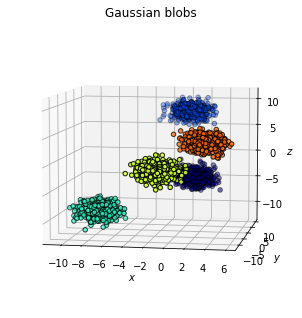

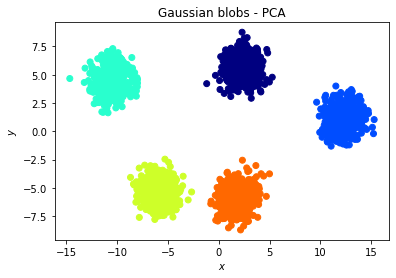

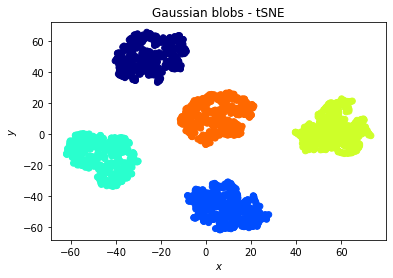

In [11]:
produce_plots(generate_gaussian_blobs, "blobs")

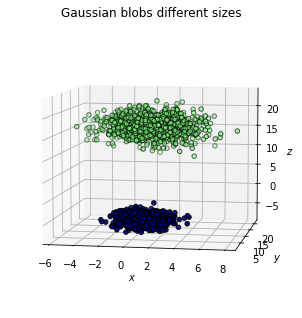

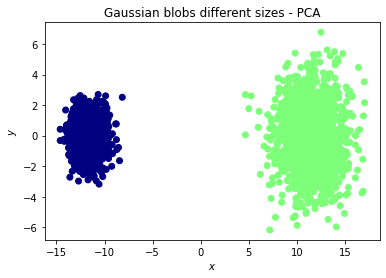

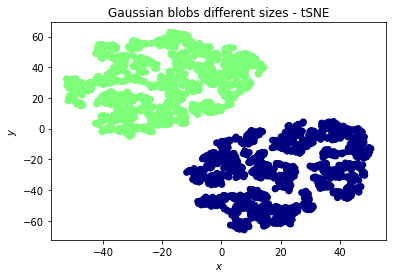

In [12]:
produce_plots(generate_gaussian_blobs_different, "blobs_diff")